In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
def generate_random(seed, coefficients, range_start, range_end):
    """
    Parameters:
        seed (int): The initial seed value.
        coefficients (list): Coefficients of the linear recurrence relation.
        range_start (int): Start of the desired range (inclusive).
        range_end (int): End of the desired range (inclusive).

    Returns:
        int: Generated random number within the specified range.
    """
    current_value = seed

    new_value = sum(coeff * current_value for coeff in coefficients)
    new_value = (new_value % (range_end - range_start + 1)) + range_start

    return int(new_value)

In [13]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os

#### Q1: finding mean of the audio data
#### it is unbalanced data, we can use oversampling or undersampling to balance the data
#### Apply data augmentation techniques to the minority class to artificially increase its size. For audio data, this might involve adding noise, changing pitch, altering speed, etc

In [14]:
directory_path = "/content/drive/MyDrive/A1_data/AUDIO_DATA/AUDIO_DATA"
audio_files = os.listdir(directory_path)
class_mean_lengths = {} # dictionary to store the mean length of each class
entire_dataset = [] # list to store each audio file in the dataset
number_of_files_in_each_class = {} # dictionary to store the number of files in each class
# print(audio_files)
for subdir in os.listdir(directory_path):
    # print(subdir)
    number_of_files_in_each_class[subdir] = []
    audio_lengths = []
    count = 0
    for filename in os.listdir(os.path.join(directory_path, subdir)):
        # print(filename)
        sound_path = os.path.join(os.path.join(directory_path, subdir), filename)
        # print(f"Loading sound file: {sound_path}")

        # Load sound file using librosa
        y, sr = librosa.load(sound_path)
        # print(f"y: {y}, sr: {sr}")
        # Calculate the duration in seconds (length) of the audio file
        audio_length = librosa.get_duration(y=y, sr=sr)
        audio_lengths.append(audio_length)
        entire_dataset.append(y)
        count += 1
        # Now you can work with the loaded audio data 'y' and the sampling rate 'sr'
    number_of_files_in_each_class[subdir].append(count)
    mean_length = sum(audio_lengths) / len(audio_lengths)
    class_mean_lengths[subdir] = mean_length
    print(f"Mean length of audio in {subdir} is {mean_length} seconds")
    print(f"Number of files in {subdir} is {count}")


Mean length of audio in CLASS_2 is 1.8874739229024944 seconds
Number of files in CLASS_2 is 10
Mean length of audio in CLASS_5 is 2.30243537414966 seconds
Number of files in CLASS_5 is 10
Mean length of audio in CLASS_3 is 49.5322477324263 seconds
Number of files in CLASS_3 is 16
Mean length of audio in CLASS_4 is 2.169120181405895 seconds
Number of files in CLASS_4 is 10
Mean length of audio in CLASS_1 is 21.973219954648528 seconds
Number of files in CLASS_1 is 10


#### Q2: select 4 random audio files and plot their spectrograms

[ 8  8 20 32]


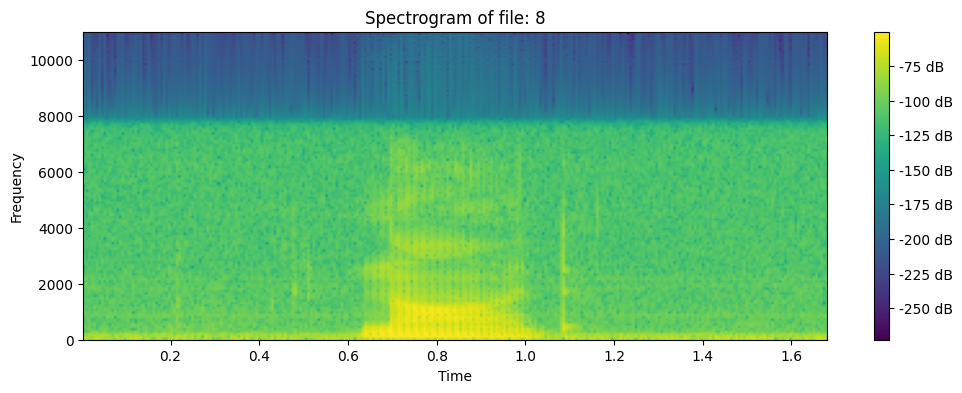

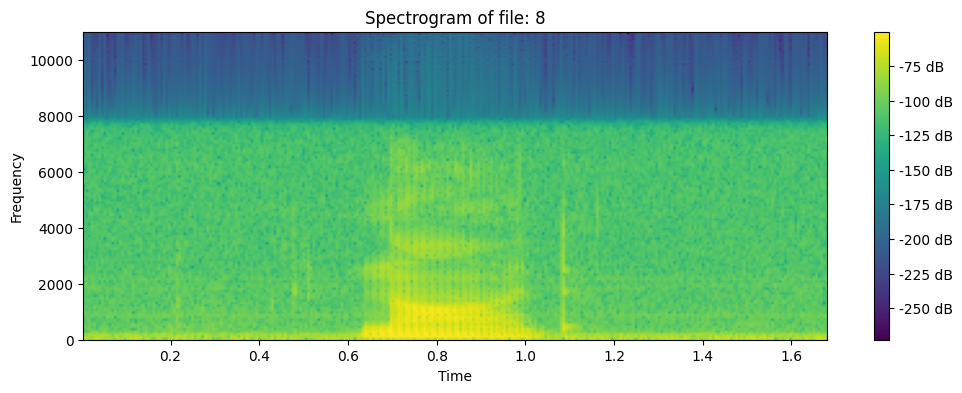

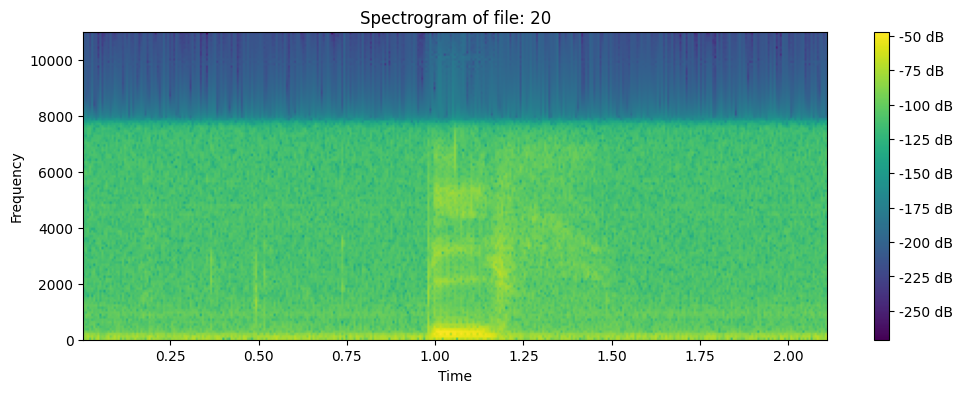

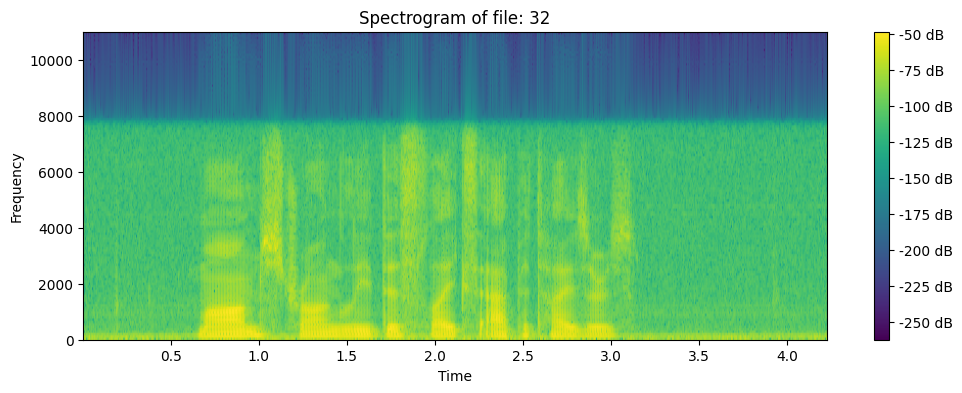

In [15]:
# select 4 random audio files from entire dataset and plot their spectrograms
random_files = np.random.randint(0, len(entire_dataset), 4)
print(random_files)
for i in random_files:
    plt.figure(figsize=(12, 4))
    plt.title(f"Spectrogram of file: {i}")
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.specgram(entire_dataset[i], Fs=22050)
    plt.colorbar(format="%+2.0f dB")
    plt.show()


#### Q3 plot before and after applying pre emphasis filter on 4 random audio files
#### a pre emphasis filter is used to boost the high frequency components of a signal that has a low frequency content . It is used to improve the signal to noise ratio of the high frequency components of the signal. The pre-emphasis filter works by boosting the higher-frequency components of the audio signal and attenuating the lower-frequency components

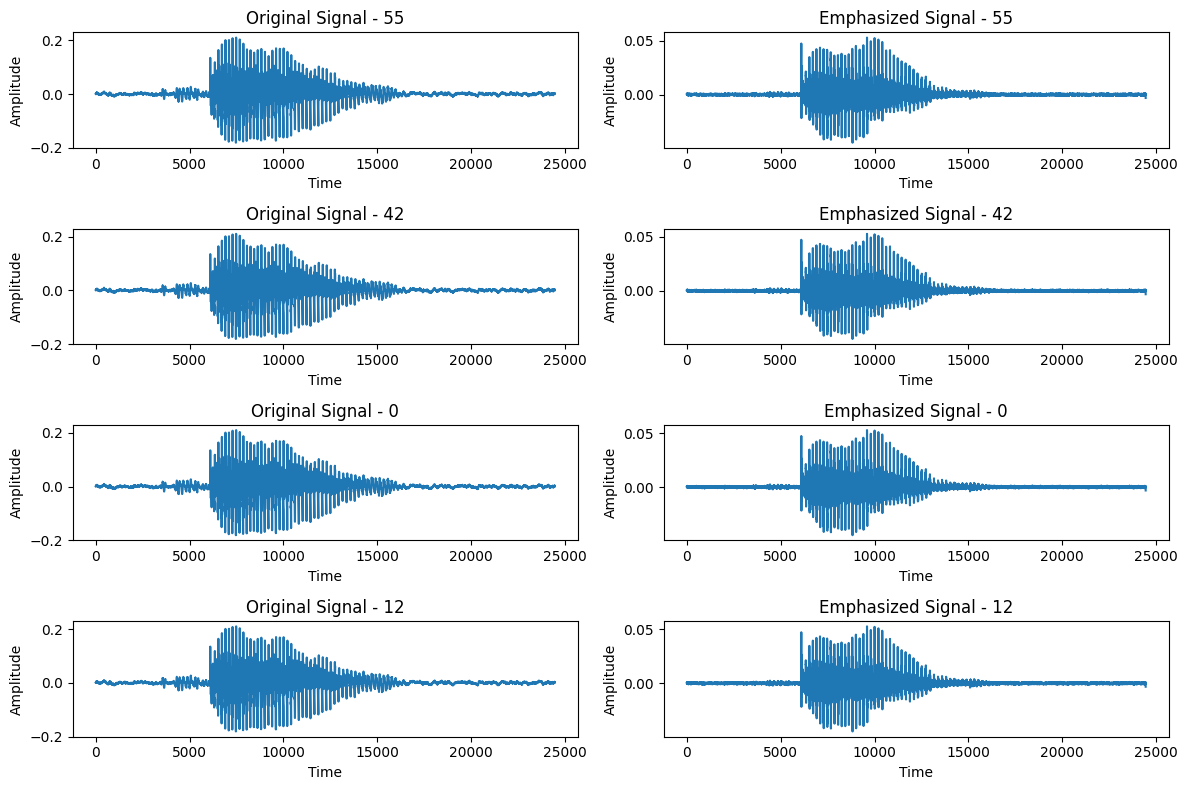

In [16]:
pre_emphasis = 0.97

# Function to apply pre-emphasis filter
def apply_pre_emphasis(signal, coefficient):
    emphasized_signal = np.append(signal[0], signal[1:] - coefficient * signal[:-1])
    return emphasized_signal

# Select and process 4 randomly chosen audio files
selected_audio_files = np.random.randint(0, len(entire_dataset), 4)

plt.figure(figsize=(12, 8))

for idx, audio_file in enumerate(selected_audio_files):
    # print(idx, audio_file, entire_dataset[audio_file])
    # y, sr = librosa.load(audio_file)

    # Apply pre-emphasis filter to the same 4 audio files selected in previous cell
    emphasized_y = apply_pre_emphasis(y, pre_emphasis)

    # Plot original and emphasized signals
    plt.subplot(4, 2, 2 * idx + 1)
    plt.plot(y)
    plt.title(f"Original Signal - {audio_file}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")

    plt.subplot(4, 2, 2 * idx + 2)
    plt.plot(emphasized_y)
    plt.title(f"Emphasized Signal - {audio_file}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

#### Q4
#### Upsampling involves increasing the sample rate of a signal by inserting additional samples between existing samples. The spectrogram's time resolution improves, resulting in narrower time bins.
#### Downsampling involves reducing the sample rate of a signal by removing some samples. This results in wider time bins in the spectrogram.

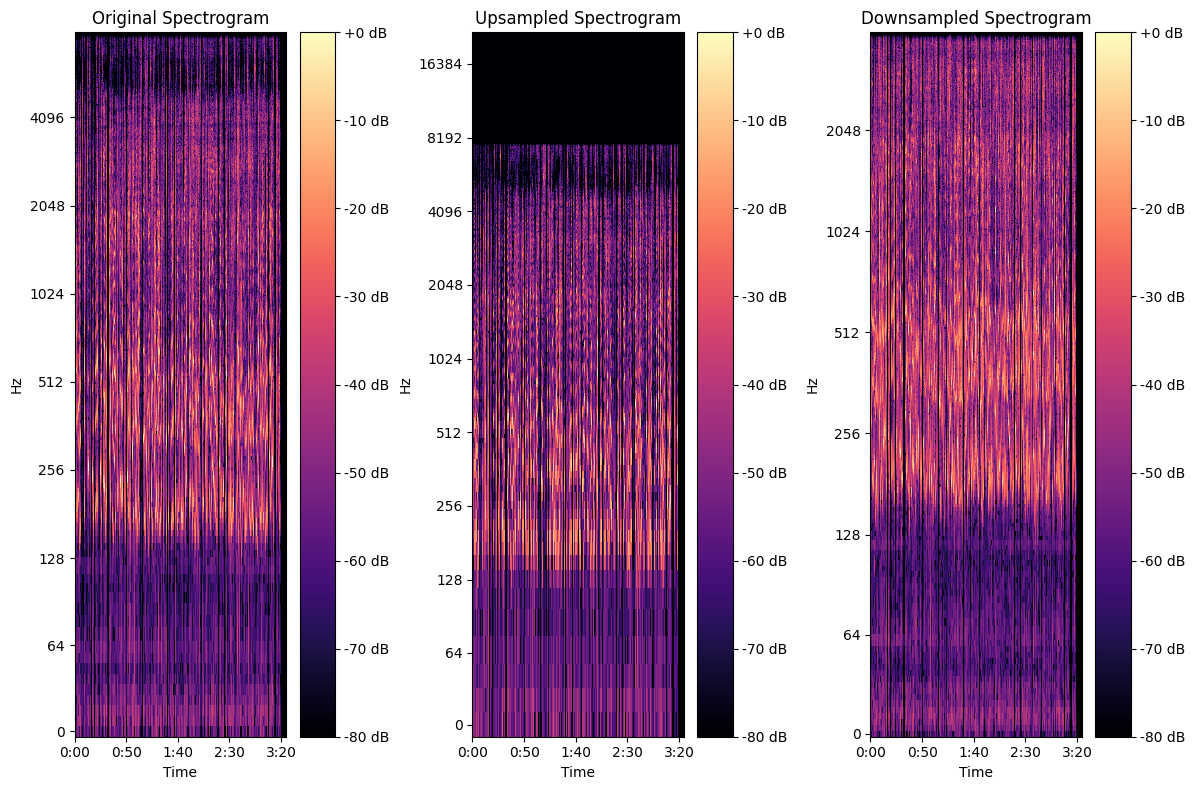

In [18]:
# Select a single audio file from class 1
sr_up = 44100  # Upsample to 44.1 kHz
sr_down = 8000  # Downsample to 8 kHz
audio_path = "/content/drive/MyDrive/A1_data/AUDIO_DATA/AUDIO_DATA/CLASS_1/speech-librivox-0053.wav"
y, sr = librosa.load(audio_path, sr=None)
plt.figure(figsize=(12, 8))
# Upsample
y_up = librosa.resample(y, orig_sr = sr,target_sr = sr_up)

# Downsample
y_down = librosa.resample(y, orig_sr = sr, target_sr = sr_down)

# Create spectrograms
plt.subplot(1, 3, 1)
librosa.display.specshow(librosa.amplitude_to_db(abs(librosa.stft(y)), ref=np.max), sr=sr, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title("Original Spectrogram")

plt.subplot(1, 3, 2)
librosa.display.specshow(librosa.amplitude_to_db(abs(librosa.stft(y_up)), ref=np.max), sr=sr_up, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title("Upsampled Spectrogram")

plt.subplot(1, 3, 3)
librosa.display.specshow(librosa.amplitude_to_db(abs(librosa.stft(y_down)), ref=np.max), sr=sr_down, y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title("Downsampled Spectrogram")

plt.tight_layout()
plt.show()

#### Q5: if length of audio file is less than 2 sec, concatenate it with itself
#### the spectrograms of .wav, .mp3 and .flac are not same because they are different file formats. .wav is uncompressed, .mp3 is compressed and .flac is lossless compressed. The spectrograms of .mp3 and .flac are similar because they are both compressed. The spectrogram of .wav is different because it is uncompressed.

Length of original audio file: 90.73632653061225 seconds
Length of audio file if no concatenation required: 90.73632653061225 seconds
Length of audio file after cropping: 2.0 seconds


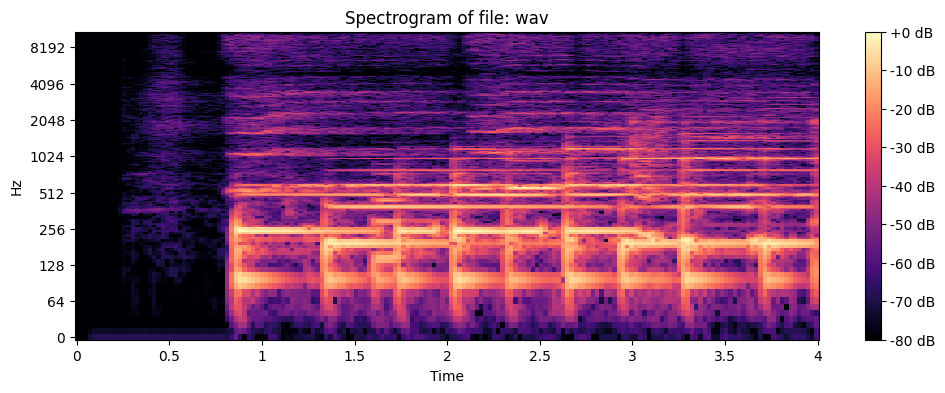

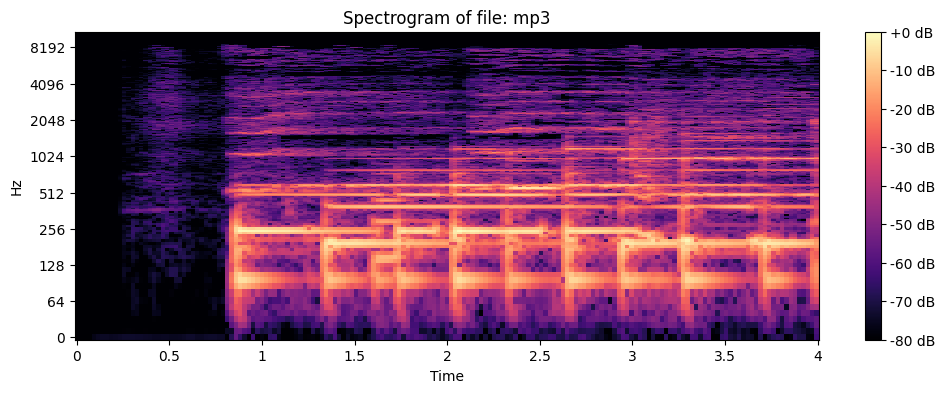

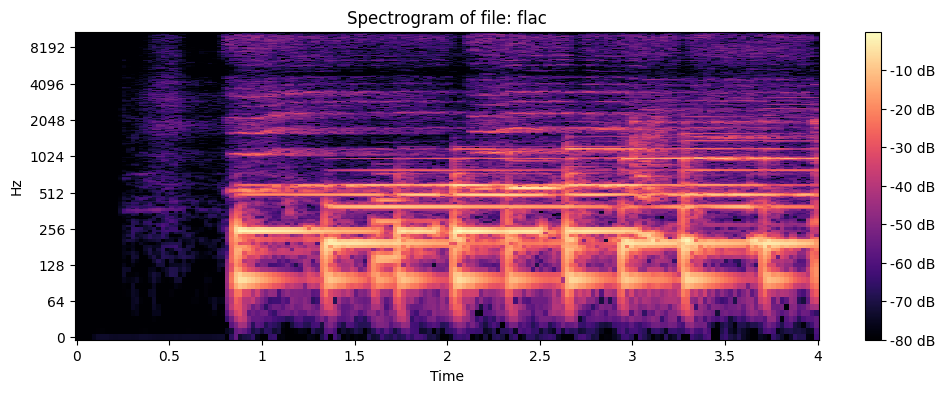

In [20]:
# select a random audio file from entire dataset, if the length of audio file is less than 2 seconds, concatenate it with itself
# not checking if selected audio file is .wav or not
import random
# select only one audio file with .wav extension from entire dataset
# random_file = random.choice([x for x in entire_dataset if x.endswith(".wav")])
random_file = random.choice(entire_dataset)
# print(random_file)
y = random_file
sr = 44100
# print(entire_dataset[random_file])
print(f"Length of original audio file: {librosa.get_duration(y=y, sr=sr)} seconds")
while librosa.get_duration(y=y, sr=sr) < 2:
    y = np.concatenate([y, y])
    print(f"New length of audio file after concatenating: {librosa.get_duration(y=y, sr=sr)} seconds")
else:
    print(f"Length of audio file if no concatenation required: {librosa.get_duration(y=y, sr=sr)} seconds")
# crop y to 2 seconds
y = y[:2*sr]
print(f"Length of audio file after cropping: {librosa.get_duration(y=y, sr=sr)} seconds")

import soundfile as sf
# save the concatenated audio file in .wav format
sf.write("/content/drive/MyDrive/A1_data/AUDIO_DATA/AUDIO_DATA/new_file.wav", y, sr)
y_wav, _ = librosa.load("/content/drive/MyDrive/A1_data/AUDIO_DATA/AUDIO_DATA/new_file.wav", sr=sr)
d_wav = librosa.amplitude_to_db(np.abs(librosa.stft(y_wav)), ref=np.max)
# plot the spectrogram of the .wav file
plt.figure(figsize=(12, 4))
plt.title(f"Spectrogram of file: wav")
plt.xlabel("Time")
plt.ylabel("Frequency")
# plt.specgram(y, Fs=22050)\
librosa.display.specshow(d_wav, y_axis='log', x_axis='time')
plt.colorbar(format="%+2.0f dB")
plt.show()
# save the concatenated audio file in .mp3 format
sf.write("/content/drive/MyDrive/A1_data/AUDIO_DATA/AUDIO_DATA/new_file.mp3", y, sr)
y_mp3,_ = librosa.load("/content/drive/MyDrive/A1_data/AUDIO_DATA/AUDIO_DATA/new_file.mp3", sr=sr)
d_mp3 = librosa.amplitude_to_db(np.abs(librosa.stft(y_mp3)), ref=np.max)
# plot the spectrogram of the .mp3 file
plt.figure(figsize=(12, 4))
plt.title(f"Spectrogram of file: mp3")
plt.xlabel("Time")
plt.ylabel("Frequency")
# plt.specgram(y, Fs=22050)
librosa.display.specshow(d_mp3, y_axis='log', x_axis='time')
plt.colorbar(format="%+2.0f dB")
plt.show()
# save the concatenated audio file in .flac format
sf.write("/content/drive/MyDrive/A1_data/AUDIO_DATA/AUDIO_DATA/new_file.flac", y, sr)
y_flac, _ = librosa.load("/content/drive/MyDrive/A1_data/AUDIO_DATA/AUDIO_DATA/new_file.flac", sr=sr)
d_flac = librosa.amplitude_to_db(np.abs(librosa.stft(y_flac)), ref=np.max)
# plot the spectrogram of the .flac file
plt.figure(figsize=(12, 4))
plt.title(f"Spectrogram of file: flac")
plt.xlabel("Time")
plt.ylabel("Frequency")
# plt.specgram(y, Fs=22050)
librosa.display.specshow(d_flac, y_axis='log', x_axis='time')
plt.colorbar(format="%+2.0f dB")
plt.show()